In [1]:
#use machine learning workflow to process
#California 1990 housing data
#to predict housing prices

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
housing = pd.read_csv(r'E:\AI\housing.csv', engine= 'python')
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


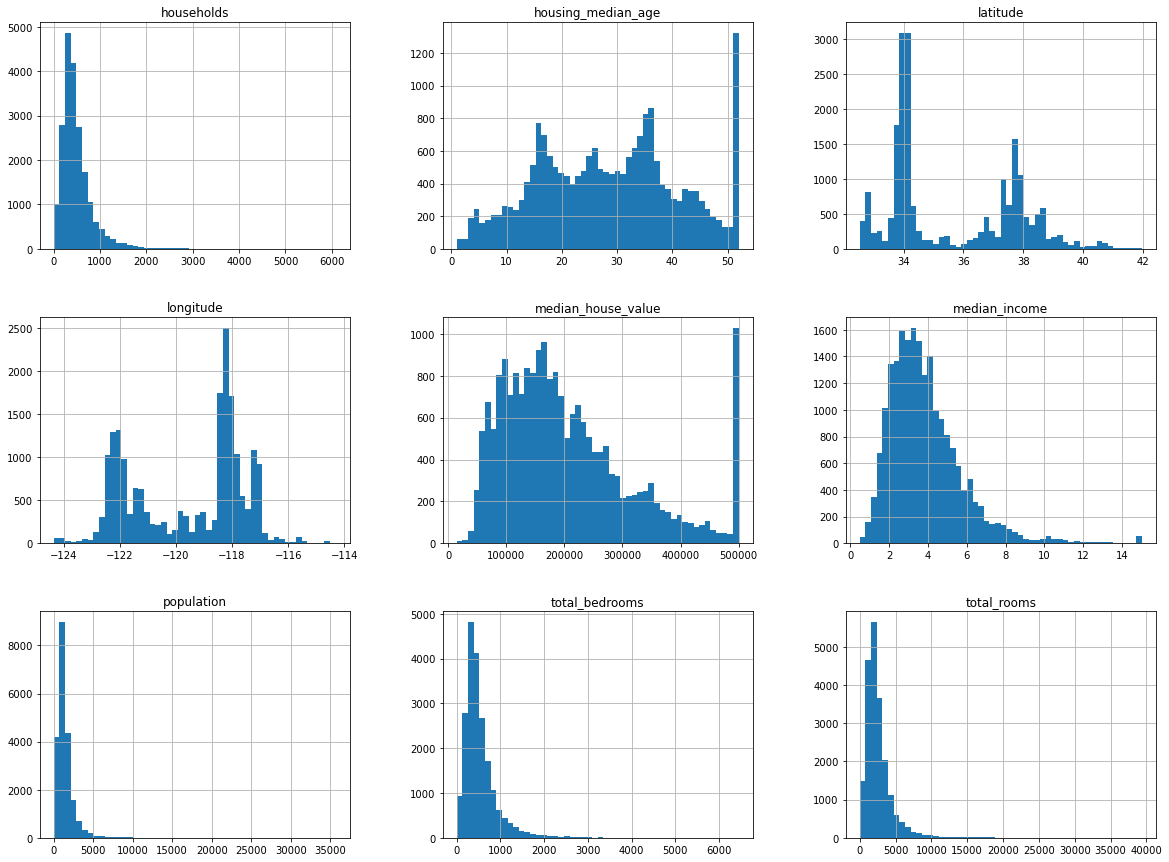

In [6]:
housing.hist(bins= 50, figsize=(20, 15))
plt.show()

In [7]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [8]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')
                                

In [9]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state= 42)

In [11]:
#here the most important attribute in determining the housing price is median income
#so the cat > 5 we merge it to cat 5
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
#create a copy of your data so that you won't affect your real data
housing = strat_train_set.copy()

In [14]:
housing_labels = strat_train_set['median_house_value'].copy()

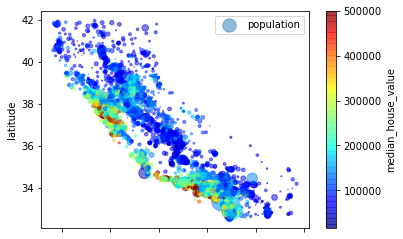

In [15]:
#we create a geographical visualization of data to see which areas are more populated
housing.plot.scatter(x= 'longitude',
                    y= 'latitude',
                    alpha= 0.5,
                    s= housing['population']/100, label= 'population',
                    c= 'median_house_value', cmap= plt.get_cmap('jet'), colorbar= True)
plt.legend()


In [16]:
#looking for correlation
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

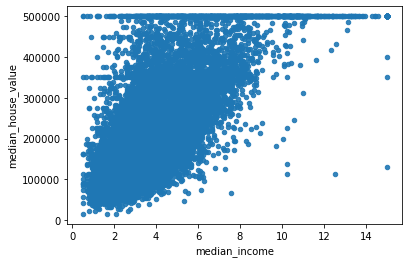

In [17]:
housing.plot.scatter(x= 'median_income',
                    y= 'median_house_value',
                    alpha= 0.9)

In [18]:
#trying different attributes to see how it relates to our data
housing['rooms_per_household'] = housing['total_rooms']/ housing['households']
housing['population_per_household'] = housing['population']/ housing['households']
housing['bedrooms_per_rooms']= housing['total_bedrooms']/ housing['total_rooms']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,population_per_household,bedrooms_per_rooms
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN,2.0,4.625369,2.094395,0.223852
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN,5.0,6.008850,2.707965,0.159057
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,196900,NEAR OCEAN,2.0,4.225108,2.025974,0.241291
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,46300,INLAND,2.0,5.232295,4.135977,0.200866
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,254500,<1H OCEAN,3.0,4.505810,3.047847,0.231341


In [19]:
#check how tha added attributes corelates with our prediction
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

In [20]:
#check if there is any missing data so that we can fix that
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
population_per_household      0
bedrooms_per_rooms          158
dtype: int64

In [21]:
#removoe the ocean proximity column so that we can fix our missing data
housing_num = housing.drop('ocean_proximity', axis= 1)

In [22]:
#fix the missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy= 'median')
housing['total_bedrooms'].fillna('median')
imputer.fit(housing_num)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [23]:
x= imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns)  #create a new dataset
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [24]:
#check if we have anymore missing data
housing_tr.isnull().any()

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms              False
population                  False
households                  False
median_income               False
median_house_value          False
income_cat                  False
rooms_per_household         False
population_per_household    False
bedrooms_per_rooms          False
dtype: bool

In [25]:
#working with text attributes
#this is coz most ml alg prefer to work with numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [26]:
#but the most preferable way of encoding is using one hot encoder
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
encoder = OneHotEncoder(sparse= False)
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [27]:
#I don't know what I did here{by the way it's called custom transformers}
from sklearn.base import BaseEstimator, TransformerMixin        
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
        housing_extra_attribs = attr_adder.transform(housing.values)

In [28]:
#data transformation
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
   ('imputer', SimpleImputer(strategy= 'median')),  #fixing missing values
    ('attribs_adder', CombinedAttributesAdder()),   #  adding missing attributes
    ('std_scaler', StandardScaler())                #for scaling numerical values
])
housing_num_tr = num_pipeline.fit_transform(housing_num) 
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [29]:
#with columnTransformer you wont have to use feature union classs
from sklearn.compose import ColumnTransformer
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']
 
full_pipeline = ColumnTransformer([
    ("num_pipeline", SimpleImputer(strategy= 'median'), num_attributes),
    ("cat_pipeline", OneHotEncoder(), cat_attributes),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-121.89,   37.29,   38.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.93,   37.05,   14.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.2 ,   32.77,   31.  , ...,    0.  ,    0.  ,    1.  ],
       ...,
       [-116.4 ,   34.09,    9.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.01,   33.82,   31.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.45,   37.77,   52.  , ...,    0.  ,    1.  ,    0.  ]])

In [30]:
#selecting a ml algorithm
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,
           housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#now train a more complex alg that looks for relationship for nonlinear data
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(housing_prepared,
            housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
#lets check if we got any error on  the above model
from sklearn.metrics import mean_squared_error
housing_predictions = dec_tree.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [33]:
#here we use cross validation that splits the test set into 10 folds and then train the d.tree 10 times
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dec_tree, housing_prepared, housing_labels,scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 90.4990201 , 237.44503633,  90.02321526,  98.35103202,
        92.51188802, 147.3159828 , 117.66968108, 107.13492515,
       106.28350827, 203.32636757])

In [34]:
#lets check the results of the above model
def display_scores(scores):
    print('scores:', scores)
    print('mean', scores.mean())
    print('standard deviation', scores.std())
    
    
display_scores(scores)

scores: [ -8190.07263923 -56380.14527845  -8104.17928528  -9672.9254997
  -8558.44942459 -21701.99878861 -13846.15384615 -11477.89218655
 -11296.18413083 -41341.61175045]
mean -19056.961282984998
standard deviation 15740.959243478155


In [35]:
#lets compare the above model with linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared,
                             housing_labels,
                            scoring = 'neg_mean_squared_error',
                            cv = 10)
rmse_lin_scores = np.sqrt(-lin_scores)  #i don't know why i am getting 
                                         #standard deviation of 2 that's too damn low
display_scores(rmse_lin_scores)
pd.Series(np.sqrt(-lin_scores)).describe()

scores: [6.56761474e-11 1.00853783e-10 1.43487668e-10 9.45364581e-11
 1.09195612e-10 8.33128943e-11 1.18421435e-10 7.82532906e-11
 9.08176494e-11 9.75219508e-11]
mean 9.820768888487895e-11
standard deviation 2.081706817891273e-11


count    1.000000e+01
mean     9.820769e-11
std      2.194312e-11
min      6.567615e-11
25%      8.518908e-11
50%      9.602920e-11
75%      1.071102e-10
max      1.434877e-10
dtype: float64

In [36]:
from sklearn.externals import joblib
joblib.dump(lin_reg, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [37]:
from sklearn.svm import SVR
svm_reg = SVR(kernel = 'linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
#svm_rmse
display_scores(svm_mse)  #this is weird a standard deviation of 0?

scores: 0.002693936440723214
mean 0.002693936440723214
standard deviation 0.0


In [42]:
from sklearn.ensemble import RandomForestRegressor  #trying another model
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
#fine tuning your model
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()
param_grid = [
    {'n_estimators': [30, 50], 'max_features': [2, 4, 8],
    'min_samples_split': [2, 6, 10], 'bootstrap': [True, False]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv= 5, scoring= 'neg_mean_squared_error')
print(' your program took %s seconds ' %(time.time() - start_time))
grid_search.fit(housing_prepared, housing_labels)


 your program took 0.0 seconds 


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [46]:
#let's try to check the evaluation of the scores
start_time = time.time()
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
print('evaluating the  scores took %s seconds' %(time.time() - start_time))

23359.117224628408 {'bootstrap': True, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 30}
22908.964005943235 {'bootstrap': True, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}
24573.65905880692 {'bootstrap': True, 'max_features': 2, 'min_samples_split': 6, 'n_estimators': 30}
23876.97411591141 {'bootstrap': True, 'max_features': 2, 'min_samples_split': 6, 'n_estimators': 50}
25191.66969194127 {'bootstrap': True, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 30}
24927.667116308752 {'bootstrap': True, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 50}
11336.749170472236 {'bootstrap': True, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 30}
10847.761833280172 {'bootstrap': True, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
11505.711884409917 {'bootstrap': True, 'max_features': 4, 'min_samples_split': 6, 'n_estimators': 30}
10799.187692516405 {'bootstrap': True, 'max_features': 4, 'min_samples_split': 6, '

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.04215777e-03, 4.98035585e-03, 3.54963484e-03, 7.04698228e-04,
       5.43757422e-04, 7.93665651e-04, 6.89510192e-04, 1.34206815e-01,
       7.32431394e-01, 3.49051835e-02, 4.17633555e-03, 1.54673296e-02,
       6.12154993e-03, 1.57508165e-03, 5.62785206e-02, 2.73031175e-06,
       2.60899189e-04, 2.70380488e-04])

In [52]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis= 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 14 and input n_features is 10.